In [1]:
# Import dependencies
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [365]:
def image_loader(path, batch_size):
    transform = transforms.Compose(
        [
#             transforms.ColorJitter(brightness=0.1, contrast=0.1,hue=.2, saturation=.3),
            
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]
    )
    transform1 = transforms.Compose(
        [
            transforms.Resize(128),
                transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
                transforms.RandomHorizontalFlip(),
                transforms.RandomAffine(15),
                transforms.RandomResizedCrop(size=96,scale=(0.8, 1.0)),
                transforms.ToTensor(),
                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
            ]
    )
    sup_train_data = datasets.ImageFolder('{}/{}/train'.format(path, 'supervised'), transform=transform)
    sup_val_data = datasets.ImageFolder('{}/{}/val'.format(path, 'supervised'), transform=transform)
    unsup_data = datasets.ImageFolder('{}/{}/'.format(path, 'unsupervised'), transform=transform)
    data_loader_sup_train = torch.utils.data.DataLoader(
        sup_train_data,
        batch_size=batch_size,
        shuffle=True,
        num_workers=0
    )
    data_loader_sup_val = torch.utils.data.DataLoader(
        sup_val_data,
        batch_size=batch_size,
        shuffle=True,
        num_workers=0
    )
    data_loader_unsup = torch.utils.data.DataLoader(
        unsup_data,
        batch_size=batch_size,
        shuffle=True,
        num_workers=0
    )
    print('sup_train_data.class_to_idx==sup_val_data.class_to_idx:',sup_train_data.class_to_idx==sup_val_data.class_to_idx)
    return data_loader_sup_train, data_loader_sup_val, data_loader_unsup,sup_train_data,sup_train_data.class_to_idx,sup_val_data.class_to_idx

In [366]:
import os
path = os.getcwd()+"/ssl_data_96"
batch_size = 64
# input_size = 96
data_loader_sup_train, data_loader_sup_val, data_loader_unsup,sup_train_data,sup_class_to_idx_dict,val_class_to_idx_dict = image_loader(path, batch_size)


sup_train_data.class_to_idx==sup_val_data.class_to_idx: True


In [267]:
def show_dataset(dataset, n=1):
  img = np.vstack((np.hstack((np.asarray(dataset[10][0]) for _ in range(n)))
                   ))
  plt.figure(figsize=(20,10))
  plt.imshow(img)
  plt.axis('off')


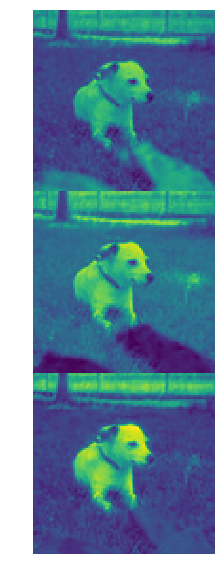

In [260]:
show_dataset(sup_train_data)

In [345]:
sup_train_data.class_to_idx

{'n00015388': 0,
 'n00288000': 1,
 'n00326094': 2,
 'n00433661': 3,
 'n00439826': 4,
 'n00440941': 5,
 'n00442847': 6,
 'n00445226': 7,
 'n00445351': 8,
 'n00445685': 9,
 'n00445802': 10,
 'n00446980': 11,
 'n00447073': 12,
 'n00447957': 13,
 'n00448126': 14,
 'n00448232': 15,
 'n00448748': 16,
 'n00448872': 17,
 'n00448958': 18,
 'n00449054': 19,
 'n00449517': 20,
 'n00449695': 21,
 'n00450700': 22,
 'n00450998': 23,
 'n00451635': 24,
 'n00453313': 25,
 'n00454237': 26,
 'n00454395': 27,
 'n00455173': 28,
 'n00466524': 29,
 'n00466712': 30,
 'n00467719': 31,
 'n00468480': 32,
 'n00470682': 33,
 'n00470966': 34,
 'n00471437': 35,
 'n00471613': 36,
 'n00475787': 37,
 'n00479076': 38,
 'n00480211': 39,
 'n00482122': 40,
 'n00483313': 41,
 'n00825773': 42,
 'n01317813': 43,
 'n01318894': 44,
 'n01321579': 45,
 'n01322604': 46,
 'n01322983': 47,
 'n01519563': 48,
 'n01528396': 49,
 'n01536334': 50,
 'n01537134': 51,
 'n01539573': 52,
 'n01540090': 53,
 'n01540233': 54,
 'n01540832': 55,
 '

In [197]:
sup_train_data[0] #data+label

(tensor([[[0.7608, 0.7725, 0.7804,  ..., 0.5373, 0.5569, 0.5412],
          [0.7647, 0.7765, 0.7843,  ..., 0.5451, 0.5373, 0.5451],
          [0.7725, 0.7804, 0.7922,  ..., 0.5569, 0.5294, 0.5451],
          ...,
          [0.8431, 0.7961, 0.8196,  ..., 0.0667, 0.0706, 0.0627],
          [0.8196, 0.8392, 0.8314,  ..., 0.0549, 0.0706, 0.0863],
          [0.8471, 0.8235, 0.8000,  ..., 0.0588, 0.0706, 0.0902]],
 
         [[0.8000, 0.8118, 0.8196,  ..., 0.5098, 0.5294, 0.5216],
          [0.8039, 0.8157, 0.8235,  ..., 0.5216, 0.5137, 0.5255],
          [0.8118, 0.8196, 0.8314,  ..., 0.5333, 0.5059, 0.5176],
          ...,
          [0.8118, 0.7647, 0.7882,  ..., 0.0353, 0.0392, 0.0314],
          [0.7882, 0.8078, 0.8000,  ..., 0.0235, 0.0392, 0.0549],
          [0.8157, 0.7922, 0.7686,  ..., 0.0275, 0.0392, 0.0588]],
 
         [[0.8078, 0.8157, 0.8235,  ..., 0.4471, 0.4588, 0.4431],
          [0.8118, 0.8235, 0.8314,  ..., 0.4667, 0.4510, 0.4510],
          [0.8196, 0.8275, 0.8392,  ...,

In [191]:
sup_train_data[0][1] #label

0

In [180]:
len(sup_train_data)

64000

In [146]:
from scipy import ndimage
def trim_image(image,dim):
    ## calculate how many pixels need trimming off.
    temp = [(x - 96)/2.0 for x in image.shape]

    ## just trim the array
    ## can't use negative indices for the case of 0 x[-0] === x[0]
    image_out = image[round(temp[0]):(round(temp[0])+28), round(temp[1]):(round(temp[1])+28)]

    return image_out

In [91]:
img = sup_train_data[0][0]

In [92]:
img.shape

torch.Size([3, 96, 96])

In [343]:
sup_train_data[0][1]

0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 96, 96])


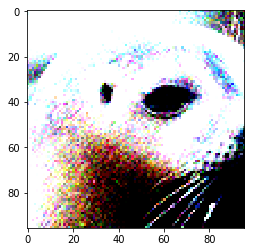

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 96, 96])


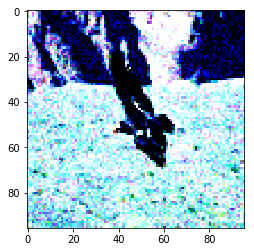

In [371]:
for i in range(2):
    img = sup_train_data[i][0]
    print(img.size())
    noisy_inputs = add_noise(img,0.2)
    img = img.permute(1, 2, 0).numpy()
#     flip_1 = np.fliplr(img)
#     f = plt.figure()
#     f.add_subplot(1,2, 1)
    plt.imshow(noisy_inputs.permute(1,2,0))
#     f.add_subplot(1,2, 2)
#     plt.imshow(inputs[0].permute(1,2,0))
    plt.savefig('{:d}_noise.png'.format(i))
    plt.show()
    
#     plt.imshow(img)
    
#     plt.show()
    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


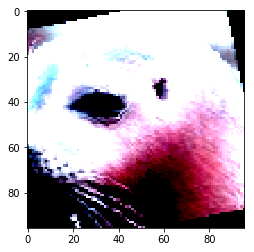

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


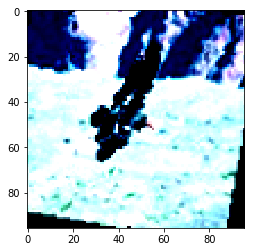

In [359]:
for i in range(2):
    img = train_data0[i][0]
    img = img.permute(1, 2, 0).numpy()
#     flip_1 = np.fliplr(img)
    plt.imshow(img)
    plt.savefig('{:d}_trans.png'.format(i))
    plt.show()

In [225]:
# Create gaussian kernels
kernel = Variable(torch.FloatTensor([[[0.006, 0.061, 0.242, 0.383, 0.242, 0.061, 0.006]]]))
# Create input
x = Variable(torch.randn(1, 1, 100))
# Apply smoothing
x_smooth = F.conv1d(x, kernel)

NameError: name 'Variable' is not defined

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 96, 96])
tensor([310, 181, 314, 165,  11, 959, 550, 241, 618, 380, 631, 633, 708, 957,
        197, 359, 617, 712,  69, 306, 198, 182, 668,  79, 450, 566, 335, 101,
        214, 638, 645, 684, 359, 641, 183, 293, 776, 310, 937, 637, 891,  35,
        788, 357, 622, 479, 960, 275, 704, 356,   5, 338, 651, 157, 952, 199,
        149, 751, 346, 798, 388, 715, 504, 731])


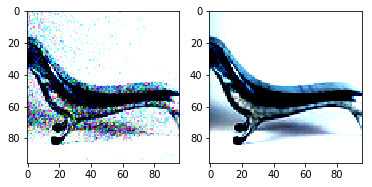

In [337]:
def add_noise(img, noise_level=0.01):
    noise = torch.randn(img.size()) * noise_level # randn produce rand num with mean 0 and var 1 (std 1 too)
    noisy_img = img + noise
    return noisy_img

for inputs, labels in data_loader_sup_train:

    print(inputs[0].size())
    print(labels)

    noisy_inputs = add_noise(inputs,0.3)
# img = inputs[0].permute(1, 2, 0).numpy()
    

    f = plt.figure()
    f.add_subplot(1,2, 1)
    plt.imshow(noisy_inputs[0].permute(1,2,0))
    f.add_subplot(1,2, 2)
    plt.imshow(inputs[0].permute(1,2,0))
    plt.show(block=True)

    break
plt.show()
    

In [119]:
sup_train_data[0][0].size()

torch.Size([3, 96, 96])

In [322]:
def image_loader(path, batch_size):
    transform0 = transforms.Compose(
        [
            transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1, hue=0.1),
            transforms.RandomHorizontalFlip(),
            transforms.RandomRotation(15),
            transforms.RandomAffine(15),
            transforms.RandomResizedCrop(size=96,scale=(0.8, 1.0)),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]
    )
    transform1 = transforms.Compose(
        [
            transforms.Resize(300),
            transforms.CenterCrop(96),
            
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]
    )
    transform2 = transforms.Compose(
        [
            transforms.ColorJitter(brightness=0.1, contrast=0.1,hue=.2, saturation=.3),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]
    )
    train_data0 = datasets.ImageFolder('{}/{}/train'.format(path, 'supervised'), transform=transform0)
    train_data1 = datasets.ImageFolder('{}/{}/train'.format(path, 'supervised'), transform=transform1)
    train_data2 = datasets.ImageFolder('{}/{}/train'.format(path, 'supervised'), transform=transform2)
    val_data = datasets.ImageFolder('{}/{}/val'.format(path, 'supervised'), transform=transform0)
    unsup_data = datasets.ImageFolder('{}/{}/'.format(path, 'unsupervised'), transform=transform0)
    #concat several datasets together
    train_loader = torch.utils.data.DataLoader(
        torch.utils.data.ConcatDataset([train_data0,
        train_data1,train_data2]), batch_size=batch_size, shuffle=True, num_workers=1)
#     data_loader_sup_train = torch.utils.data.DataLoader(
#         sup_train_data,
#         batch_size=batch_size,
#         shuffle=True,
#         num_workers=0
#     )
    val_loader = torch.utils.data.DataLoader(
        val_data,
        batch_size=batch_size,
        shuffle=True,
        num_workers=0
    )
    unsup_loader = torch.utils.data.DataLoader(
        unsup_data,
        batch_size=batch_size,
        shuffle=True,
        num_workers=0
    )
    
    return train_loader, val_loader, unsup_loader,train_data0,train_data0.class_to_idx,val_data.class_to_idx

In [323]:
import os
path = os.getcwd()+"/ssl_data_96"
batch_size = 64
# input_size = 96
train_loader, val_loader, unsup_loader,train_data0,sup_class_to_idx_dict,val_class_to_idx_dict = image_loader(path, batch_size)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([3, 96, 96])


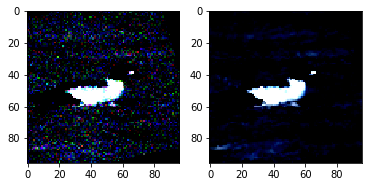

In [328]:
for inputs, labels in train_loader:

    print(inputs[0].size())

    noisy_inputs = add_noise(inputs,0.3)
# img = inputs[0].permute(1, 2, 0).numpy()
    

    f = plt.figure()
    f.add_subplot(1,2, 1)
    plt.imshow(noisy_inputs[0].permute(1,2,0))
    f.add_subplot(1,2, 2)
    plt.imshow(inputs[0].permute(1,2,0))
    plt.show(block=True)

    break
plt.show()
    

In [306]:
len(train_loader.dataset)

192000

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


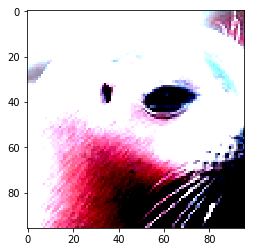

In [321]:
plt.imshow(data_loader_sup_train.dataset[0][0].permute(1,2,0))

In [319]:
data_loader_sup_train.dataset[0][0]

tensor([[[ 1.2899,  1.3070,  1.3413,  ...,  0.2796,  0.3652,  0.2967],
         [ 1.2899,  1.3242,  1.3584,  ...,  0.3138,  0.2796,  0.3138],
         [ 1.3242,  1.3413,  1.3927,  ...,  0.3652,  0.2282,  0.3138],
         ...,
         [ 1.6153,  1.3927,  1.5125,  ..., -1.7754, -1.7583, -1.7925],
         [ 1.5125,  1.5982,  1.5639,  ..., -1.8268, -1.7583, -1.6898],
         [ 1.6324,  1.5297,  1.4098,  ..., -1.8097, -1.7583, -1.6727]],

        [[ 1.6232,  1.6583,  1.6933,  ...,  0.2052,  0.2752,  0.2577],
         [ 1.6408,  1.6933,  1.7283,  ...,  0.2752,  0.2227,  0.2577],
         [ 1.6758,  1.7108,  1.7633,  ...,  0.3102,  0.2052,  0.2402],
         ...,
         [ 1.5532,  1.3606,  1.4482,  ..., -1.8431, -1.8256, -1.8606],
         [ 1.4482,  1.5357,  1.5007,  ..., -1.8957, -1.8256, -1.7556],
         [ 1.5707,  1.4657,  1.3782,  ..., -1.8782, -1.8256, -1.7381]],

        [[ 1.8208,  1.8383,  1.8731,  ...,  0.2522,  0.3045,  0.2348],
         [ 1.8383,  1.8905,  1.9254,  ...,  0